In [20]:
from math import exp
import numpy as np


def n(y: float) -> float:
    return exp(-(y**2))


def K_1(fn, t, x, y, p, q, h):
    return fn(t, x, y, p, q)


def K_2(k1, fn, t, x, y, p, q, h):
    return fn(
        t + h / 2,
        x + (h * k1) / 2,
        y + (h * k1) / 2,
        p + (h * k1) / 2,
        q + (h * k1) / 2,
    )


def K_3(k2, fn, t, x, y, p, q, h):
    return fn(
        t + h / 2,
        x + (h * k2) / 2,
        y + (h * k2) / 2,
        p + (h * k2) / 2,
        q + (h * k2) / 2,
    )


def K_4(k3, fn, t, x, y, p, q, h):
    return fn(t + h / 2, x + (h * k3), y + (h * k3), p + (h * k3), q + (h * k3))


def f(t, x, y, p, q):
    return p / n(y) ** 2


def g(t, x, y, p, q):
    return q / n(y) ** 2


def u(t, x, y, p, q):
    return 0


def v(t, x, y, p, q):
    return -2 * y


def runge_kutta_4(
    t0: float, t1: float, h: float, x0: float, y0: float, p0: float, q0: float
):
    t = np.linspace(t0, t1, int(round((t1 - t0) / h)))
    x = np.zeros(t.size)
    y = np.zeros(t.size)
    p = np.zeros(t.size)
    q = np.zeros(t.size)
    x[0] = x0
    y[0] = y0
    p[0] = p0
    q[0] = q0
    for i in range(1, t.size):
        k1 = (
            K_1(f, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_1(g, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_1(u, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_1(v, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
        )
        k2 = (
            K_2(k1[0], f, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_2(k1[1], g, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_2(k1[2], u, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_2(k1[3], v, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
        )
        k3 = (
            K_3(k2[0], f, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_3(k2[1], g, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_3(k2[2], u, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_3(k2[3], v, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
        )
        k4 = (
            K_4(k3[0], f, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_4(k3[1], g, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_4(k3[2], u, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
            K_4(k3[3], v, t[i - 1], x[i - 1], y[i - 1], p[i - 1], q[i - 1], h),
        )
        x[i] = x[i - 1] + h * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
        y[i] = y[i - 1] + h * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
        p[i] = p[i - 1] + h * (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2]) / 6
        q[i] = q[i - 1] + h * (k1[3] + 2 * k2[3] + 2 * k3[3] + k4[3]) / 6
    return t, x, y, p, q

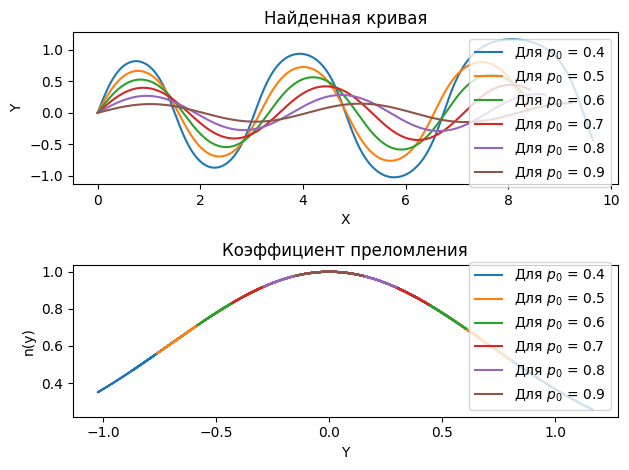

In [21]:
from matplotlib import pyplot as plt

p0s = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fig, axis = plt.subplots(2)
for p0 in p0s:
    t, x, y, p, q = runge_kutta_4(0, 10, 0.01, 0, 0, p0, (1 - p0**2))
    # print(p0, len(q), min(q[-500:]), max(q[-500:]), min(p), max(p))
    axis[0].plot(x, y, label=f"Для $p_0$ = {p0}")
    axis[0].legend()
    axis[0].set_title("Найденная кривая")
    axis[1].plot(y, np.exp(-(y**2)), label=f"Для $p_0$ = {p0}")
    axis[1].legend()
    axis[1].set_title("Коэффициент преломления")
    axis[0].set(xlabel="X", ylabel="Y")
    axis[1].set(xlabel="Y", ylabel="n(y)")
    fig.tight_layout()

plt.show()